<a href="https://colab.research.google.com/github/obeabi/Bayesian_AB_Testing/blob/main/Greedy_Epsilon_RealValuedReward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Initalize constant
NUM_TRIALS = 10000
EPS = 0.1


# True win rates of bandits or prboabiilties of bandits
#BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]   

## Bandit Arm Class

In [8]:

class BanditArm:
  def __init__(self, m,eps):
    self.m = m
    self.m_estimate = 0
    self.N = 0
    self.eps = eps

  def pull(self):
    return np.random.randn() + self.m  # drawing a sample from the gaussian distribution with mean m and varaince of 1

  def update(self, x):
    self.N += 1
    self.m_estimate = (1 - 1.0/self.N)*self.m_estimate + 1.0/self.N*x


  def update_EPS(self, eps):
      self.eps = 1*(self.eps *0.75**0.5)

## Create experiment

In [9]:
def run_experiment(m1, m2, m3, eps, N):
  bandits = [BanditArm(m1,eps), BanditArm(m2,eps), BanditArm(m3,eps)]

  # count number of suboptimal choices
  means = np.array([m1, m2, m3])
  true_best = np.argmax(means)
  count_suboptimal = 0

  data = np.empty(N)
  
  for i in range(N):
    # epsilon greedy
    p = np.random.random()

    if p < eps:
      j = np.random.choice(len(bandits))
    else:
      j = np.argmax([b.m_estimate for b in bandits])

    x = bandits[j].pull()
    bandits[j].update(x)
    # update the EPS for the bandit whose arm we just pulled
    bandits[j].update_EPS(eps)

    if j != true_best:
      count_suboptimal += 1

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.m_estimate)

  print("percent suboptimal for epsilon = %s:" % eps, float(count_suboptimal) / N)

  return cumulative_average


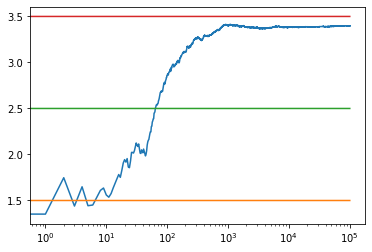

1.495703110408412
2.506592984895068
3.494410927810998
percent suboptimal for epsilon = 0.1: 0.06509


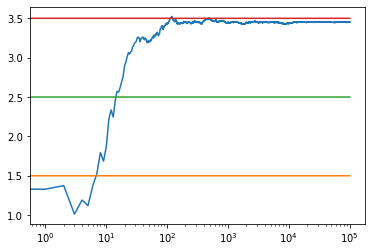

1.4779958595106295
2.499840013088169
3.500041601765457
percent suboptimal for epsilon = 0.05: 0.03269


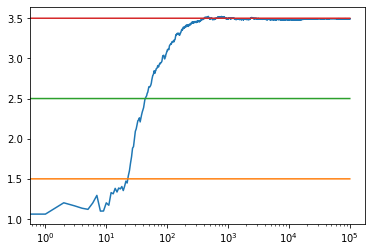

1.5507434057115512
2.5042840251149205
3.502043506278737
percent suboptimal for epsilon = 0.01: 0.00668


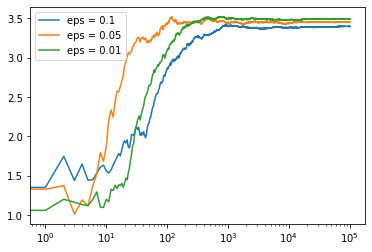

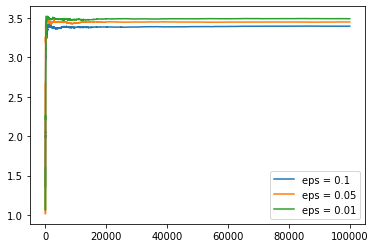

In [10]:
if __name__ == '__main__':
  m1, m2, m3 = 1.5, 2.5, 3.5
  c_1 = run_experiment(m1, m2, m3, 0.1, 100000)
  c_05 = run_experiment(m1, m2, m3, 0.05, 100000)
  c_01 = run_experiment(m1, m2, m3, 0.01, 100000)

  # log scale plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.xscale('log')
  plt.show()


  # linear plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.show()